In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

DIFFUSIVITY = 0.6 # Diffusivity, may want to check the vaidity of this paticular number
r_0 = 1.2 # In fm, may want to chose a better value for small nuclei
NUM_CORE_NUCLEONS = 10 # The number of nucleons in the core
TOT_ANG_MOMENTUM = 0.5 # Total angular momentum
ORB_ANG_MOMENTUM = 0 # Orbital angular momentum
BETA_PARAMS = [5.000e-02, 1.000e-01, 2.000e-01, 4.000e-01, 8.000e-01, 1.600e+00, 3.200e+00,
               6.400e+00, 1.280e+01, 2.560e+01, 5.120e+01, 1.024e+02]


STARTING_POTENTIAL_PARAM = 0.05
def geometric_progression(potential_parameter, i, geometric_progression_number=2):
    return potential_parameter * geometric_progression_number**(i)
POTENTIAL_PARAMS = np.zeros(shape=(1, 12))
for i in range(12):
    POTENTIAL_PARAMS[0, i] = geometric_progression(STARTING_POTENTIAL_PARAM, i)
print(POTENTIAL_PARAMS)

INITAL_C_GUESS = 0.01
V_LS = 21.0

[[5.000e-02 1.000e-01 2.000e-01 4.000e-01 8.000e-01 1.600e+00 3.200e+00
  6.400e+00 1.280e+01 2.560e+01 5.120e+01 1.024e+02]]


In [2]:
# def twelve_gaussian_potential(r, c_1, c_2, c_3, c_4, c_5, c_6, c_7, c_8, c_9, c_10, c_11, c_12, beta_params=BETA_PARAMS, orb_ang_moment=ORB_ANG_MOMENTUM):
#     """
#     Defines our gaussian potential as a sum of 5 different potentials of the form V_0 e^(beta*r^2), for a set
#     of beta.
#     Input
#     r : 1D array
#     """
#     V_0 = -11.39 * (-1)**orb_ang_moment - 51.13 # Defines V_0 for odd and even l states
#     print(beta_params)
#     print(BETA_PARAMS)
#     print(orb_ang_moment)
#     return - (V_0) * (c_1 * np.exp(-beta_params[0] * r**2) + c_2 * np.exp(-beta_params[1] * r**2) + c_3 * np.exp(
#         -beta_params[2] * r**2) + c_4 * np.exp(-beta_params[3] * r**2) + c_5 * np.exp(-beta_params[4] * r**2) + c_6 * np.exp(
#         -beta_params[5] * r**2) + c_7 * np.exp(-beta_params[6] * r**2) + c_8 * np.exp(-beta_params[7] * r**2) + c_9 * np.exp(
#         -beta_params[8] * r**2) + c_10 * np.exp(-beta_params[9] * r**2) + c_11 * np.exp(
#         -beta_params[10] * r**2) + c_12 * np.exp(-beta_params[11] * r**2))

def twelve_gaussian_potential(r, c_1, c_2, c_3, c_4, c_5, c_6, c_7, c_8, c_9, c_10, c_11, c_12):
    """
    Defines our gaussian potential as a sum of 5 different potentials of the form V_0 e^(beta*r^2), for a set
    of beta.
    Input
    r : 1D array
    """
    V_0 = -11.39 * (-1)**ORB_ANG_MOMENTUM - 51.13 # Defines V_0 for odd and even l states

    return (gaussian_function(r, c_1, POTENTIAL_PARAMS[0, 0]) + gaussian_function(r, c_2, POTENTIAL_PARAMS[0, 1])
            + gaussian_function(r, c_3, POTENTIAL_PARAMS[0, 2]) + gaussian_function(r, c_4, POTENTIAL_PARAMS[0, 3])
            + gaussian_function(r, c_5, POTENTIAL_PARAMS[0, 4]) + gaussian_function(r, c_6, POTENTIAL_PARAMS[0, 5])
            + gaussian_function(r, c_7, POTENTIAL_PARAMS[0, 6]) + gaussian_function(r, c_8, POTENTIAL_PARAMS[0, 7])
            + gaussian_function(r, c_9, POTENTIAL_PARAMS[0, 8]) + gaussian_function(r, c_10, POTENTIAL_PARAMS[0, 9])
            + gaussian_function(r, c_11, POTENTIAL_PARAMS[0, 10]) + gaussian_function(r, c_12, POTENTIAL_PARAMS[0, 11]))

def gaussian_function(r, c, β):
    return c * np.exp(-β * (r)**2)

def woods_saxon_function(r, r_0=r_0, A_c=NUM_CORE_NUCLEONS, a=DIFFUSIVITY):
    R_0 = r_0 * A_c**(1/3)
    return 1 / (1 + np.exp((r - R_0) / a))

def woods_saxon_function_derivative(r, r_0=r_0, A_c=NUM_CORE_NUCLEONS, a=DIFFUSIVITY):
    R_0 = r_0 * A_c**(1/3)
    numerator = np.exp((r - R_0) / a)
    denominator = a * (np.exp((r - R_0) / a) + 1)**2
    return -1 * numerator * denominator

def spin_orbit_coefficent(j=TOT_ANG_MOMENTUM, l=ORB_ANG_MOMENTUM):
    return (j * (j + 1) - l * (l + 1) - 3 / 4 ) / 2

def full_ws_potential(r, V_ls=V_LS, orb_ang_moment=ORB_ANG_MOMENTUM):
    potential_depth = -11.39 * (-1)**orb_ang_moment - 51.13
    return potential_depth * woods_saxon_function(r) + V_ls * spin_orbit_coefficent() * (1 / r) * woods_saxon_function_derivative(r)


Now do the curevfit

In [3]:
x_data = np.linspace(0.0000001, 12, 10000)
result, variances = curve_fit(
    twelve_gaussian_potential, x_data, full_ws_potential(x_data))
print(result)

[  -2.20325082    8.805878   -156.81065165  103.98341216   -1.56877559
  -30.53077774   32.26066114  -27.54625751   20.71335292  -13.61817415
    6.70243229   -1.89204065]


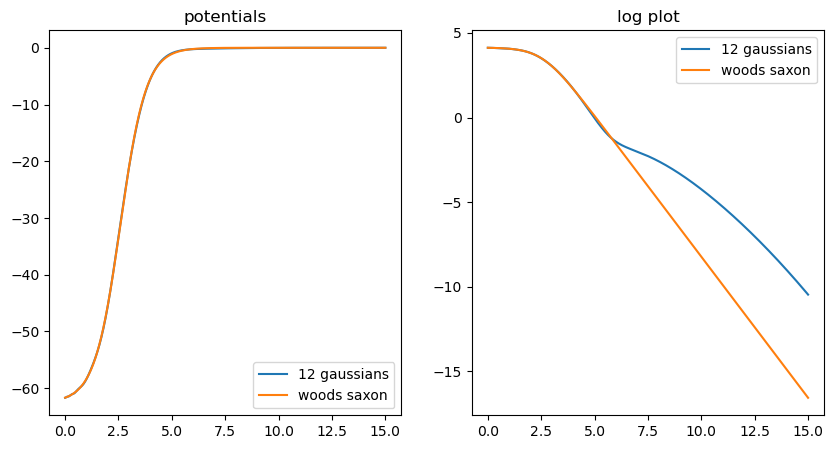

In [7]:
fig = plt.figure(figsize = (10,5))
X_vals = np.linspace(0.0000000000001, 15, 10000)

spec = fig.add_gridspec(ncols=2, nrows=1)
ax_1 = fig.add_subplot(spec[0, 0])
ax_2 = fig.add_subplot(spec[0, 1])

gaussian_potentials_twelve = twelve_gaussian_potential(X_vals, result[0], result[1], result[2], result[3], result[4], result[5],
                                               result[6], result[7], result[8], result[9], result[10], result[11])

ax_1.plot(X_vals, gaussian_potentials_twelve, label = '12 gaussians')
ax_1.plot(X_vals, full_ws_potential(X_vals), label = 'woods saxon')
ax_1.legend()
ax_1.set_title('potentials')

ax_2.plot(X_vals, np.log(np.abs(gaussian_potentials_twelve)), label = '12 gaussians')
ax_2.plot(X_vals, np.log(np.abs(full_ws_potential(X_vals))), label = 'woods saxon')
ax_2.legend()
ax_2.set_title('log plot')

plt.show()